In [1]:
%matplotlib inline
#%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#LLT inviscid implementation for rectangular and trapezoidal wings with and without twist

In [4]:
#Aerodynamics for engineers. J. Bertin, R. Cummings. 6ed. Example 7.2

rho = 1.225
v_inf = 100

target_weight = 4000

#Number of setions
n = 40       #D(4)

#Manual input of AR and TR
AR = 9     #D(9)
TR = 0.4   #D(0.4)

c_root = 0.726  #D(0.726)
c_tip = 0.290   #D(0.290)

b      = 2*2.286  #semi-span - one wing
b_half = 2.286   #semi-span - one wing - D(2.286)

#Area when using wing-span b
#area = ((b)**2)/AR

#Area when using wing semi-span b/2
#This is the area for one wing.
#area = ((2*b_half)**2)/AR
area = (0.5*(c_root + c_tip))*b_half

#Computed AR using compute area
#Attention is area computed using one b/2 you must multiply area by 2
AR_computed = b**2/(2*area)

#Cmputed TR
TR_computed = c_tip/c_root

#Airfoil cl slope
a0 = 2*np.pi

#Alpha zero-lift
alpha_0 = -1.2  #D(-1.2)

#i_w = 2            # wing setting angle (deg)
#alpha_twist = -1;  # Twist angle (deg)

AOA = 2;            # Wing angle of attack (deg) - D(2)
i_w = 2;             # wing setting angle (deg) - This is the angle at the root - D(2)
alpha_twist = 0;    # Twist angle (deg), for washout the value is negative - D(0)

alpha_effective = AOA + i_w    #Actual AOA at root (deg)

#alpha = i_w+alpha_twist:-alpha_twist/(N-1):i_w;
#alpha = np.linspace(i_w+alpha_twist,i_w,n)  
alpha = np.linspace(alpha_effective+alpha_twist,alpha_effective,n)   #(deg)


In [5]:
print("Computed area for semi wingspan = ", 1*area)
print("Computed area for wingspan = ", 2*area)
print("Computed AR = ", AR_computed)
print("Computed TR = ", TR_computed)

Computed area for semi wingspan =  1.161288
Computed area for wingspan =  2.322576
Computed AR =  8.999999999999998
Computed TR =  0.39944903581267216


In [6]:
print("Angle of attack AOA (deg) = ", AOA)
print("Wing setting angle (deg) = ", i_w )
print("Effective angle of attack at the root (AOA + wing setting angle) = ", alpha_effective)
print("Geometrical twist in deg (negative means washout) = ", alpha_twist)
#print("Twist distribution (in degrees) = ", alpha)
print("Twist distribution tip-to-root (deg) = ", alpha)

Angle of attack AOA (deg) =  2
Wing setting angle (deg) =  2
Effective angle of attack at the root (AOA + wing setting angle) =  4
Geometrical twist in deg (negative means washout) =  0
Twist distribution tip-to-root (deg) =  [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [7]:
#theta = np.linspace(np.pi/(2*n),np.pi/2,n)

if n == 4:
    #theta_force = 22.5    #Force theta so we have same setup as in bertin
    #theta = np.linspace(0,90,n-1) + theta_force
    theta = np.array([22.5,45,67.5,90])
else:
    eps = 1e-8     #Do not start from zero in will divide by zero
    theta = np.linspace(eps,90,n)
    

theta_r = theta*np.pi/180
theta_deg = theta


In [8]:
print("Theta angle (rad) = ", theta_r)

Theta angle (rad) =  [1.74532925e-10 4.02768291e-02 8.05536579e-02 1.20830487e-01
 1.61107316e-01 2.01384145e-01 2.41660974e-01 2.81937802e-01
 3.22214631e-01 3.62491460e-01 4.02768289e-01 4.43045118e-01
 4.83321947e-01 5.23598776e-01 5.63875605e-01 6.04152433e-01
 6.44429262e-01 6.84706091e-01 7.24982920e-01 7.65259749e-01
 8.05536578e-01 8.45813407e-01 8.86090236e-01 9.26367065e-01
 9.66643893e-01 1.00692072e+00 1.04719755e+00 1.08747438e+00
 1.12775121e+00 1.16802804e+00 1.20830487e+00 1.24858170e+00
 1.28885852e+00 1.32913535e+00 1.36941218e+00 1.40968901e+00
 1.44996584e+00 1.49024267e+00 1.53051950e+00 1.57079633e+00]


In [9]:
print("Theta angle (deg) = ", theta_deg)

Theta angle (deg) =  [1.00000000e-08 2.30769232e+00 4.61538462e+00 6.92307693e+00
 9.23076924e+00 1.15384615e+01 1.38461539e+01 1.61538462e+01
 1.84615385e+01 2.07692308e+01 2.30769231e+01 2.53846154e+01
 2.76923077e+01 3.00000000e+01 3.23076923e+01 3.46153846e+01
 3.69230769e+01 3.92307692e+01 4.15384615e+01 4.38461539e+01
 4.61538462e+01 4.84615385e+01 5.07692308e+01 5.30769231e+01
 5.53846154e+01 5.76923077e+01 6.00000000e+01 6.23076923e+01
 6.46153846e+01 6.69230769e+01 6.92307692e+01 7.15384615e+01
 7.38461538e+01 7.61538462e+01 7.84615385e+01 8.07692308e+01
 8.30769231e+01 8.53846154e+01 8.76923077e+01 9.00000000e+01]


In [10]:
#Compute spanwise stations using angular values

#When using wing-span b
z = (b/2)*np.cos(theta_r)

#When using wing semi-span b/2
#z = 0.5*(2*b_half)*np.cos(theta_r)


In [11]:
print("Span location (+s - center line) = ", z)

Span location (+s - center line) =  [2.28600000e+00 2.28414605e+00 2.27858721e+00 2.26933249e+00
 2.25639690e+00 2.23980143e+00 2.21957299e+00 2.19574440e+00
 2.16835431e+00 2.13744713e+00 2.10307301e+00 2.06528769e+00
 2.02415247e+00 1.97973407e+00 1.93210454e+00 1.88134112e+00
 1.82752616e+00 1.77074694e+00 1.71109557e+00 1.64866879e+00
 1.58356787e+00 1.51589840e+00 1.44577013e+00 1.37329682e+00
 1.29859601e+00 1.22178888e+00 1.14300000e+00 1.06235717e+00
 9.79991195e-01 8.96035670e-01 8.10626772e-01 7.23903034e-01
 6.36005122e-01 5.47075609e-01 4.57258736e-01 3.66700188e-01
 2.75546851e-01 1.83946576e-01 9.20479391e-02 1.39977129e-16]


In [12]:
print("Twist distribution (in degrees) = ", alpha)

Twist distribution (in degrees) =  [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [13]:
#Compute local chord

#c1 = 1 + (TR - 1) * np.cos(theta_r) * c_root
c = c_root *(1-(1-TR)*np.cos(theta_r))


In [14]:
print("Local chord = ", c)

Local chord =  [0.2904     0.29075327 0.29181252 0.29357601 0.29604091 0.29920319
 0.30305774 0.30759831 0.31281753 0.31870692 0.32525695 0.33245699
 0.34029536 0.34875933 0.3578352  0.36750823 0.37776273 0.38858208
 0.39994872 0.41184421 0.42424927 0.43714377 0.45050679 0.46431667
 0.478551   0.49318669 0.5082     0.52356659 0.53926152 0.55525934
 0.57153411 0.58805942 0.60480847 0.6217541  0.63886881 0.65612485
 0.67349422 0.69094876 0.70846016 0.726     ]


In [15]:
#mu = ( a0/(2*(1 + TR)*AR) ) * ( 1+(TR-1)*np.cos(theta_r) );
mu = (c*a0)/(2*AR*c_root*(1+TR))


In [16]:
print("Local mu = ", mu)

Local mu =  [0.0997331  0.09985443 0.10021821 0.10082385 0.10167038 0.10275641
 0.10408019 0.10563958 0.10743203 0.10945465 0.11170415 0.11417688
 0.11686884 0.11977565 0.12289261 0.12621465 0.12973639 0.13345212
 0.1373558  0.14144112 0.14570143 0.15012983 0.15471914 0.15946192
 0.16435046 0.16937685 0.17453293 0.17981033 0.18520049 0.19069468
 0.19628398 0.20195933 0.20771152 0.21353121 0.21940898 0.22533528
 0.23130051 0.23729498 0.24330898 0.24933275]


In [17]:
#Assemble matrices

#Ax=b
#x=A^-1*b
#In our case the matrices are Bx=LHS

#Angles alpha and alpha_0 must be in RAD
LHS = mu * (alpha - alpha_0)/57.3

#Coefficients of monoplane equation
B = np.zeros((n,n))

for i in range(0,n):
    for j in range(0,n):
        B[i,j] = np.sin((2*(j+1)-1) * theta_r[i]) * ( 1 + ((mu[i] * (2*(j+1)-1)) / np.sin(theta_r[i])) )

In [18]:
#Solve linear system for x - Assign x to A for consistency in notation

x = np.linalg.solve(B,LHS)
A = x


#Compute lift coefficient of the wing
CL_wing = np.pi * AR * A[0]


In [19]:
print("An coefficients = ", A)

An coefficients =  [ 1.63477218e-02  2.26233730e-04  8.39388834e-04  1.21613097e-04
  1.55821148e-04  1.82441946e-05  4.51675580e-05  1.46264299e-06
  1.79124671e-05 -1.26373079e-06  8.77647747e-06 -1.50103784e-06
  4.95877851e-06 -1.30003583e-06  3.09672472e-06 -1.06318164e-06
  2.08216040e-06 -8.65656128e-07  1.48206059e-06 -7.12900578e-07
  1.10408596e-06 -5.96857070e-07  8.53976505e-07 -5.08707692e-07
  6.81822896e-07 -4.41387759e-07  5.59501836e-07 -3.89679769e-07
  4.70337268e-07 -3.49828977e-07  4.04013912e-07 -3.19154366e-07
  3.53922746e-07 -2.95748423e-07  3.15707029e-07 -2.78263152e-07
  2.86452193e-07 -2.65796761e-07  6.21512083e-07  3.48901815e-07]


In [20]:
#Compute delta or induced drag factor

delta=0
for i in range(1,n):
    delta = delta + (2*(i+1)-1)*A[i]**2/A[0]**2

#Attention in the previous equation i=1 is A[3] in the equation of llt

    
#Compute oswald span efficiency
oswald = 1/(1+delta)

#Compute induced drag
CD_ind = (CL_wing**2/(np.pi*AR)) * (1+delta)


In [21]:
print("Induced drag factor (delta) = ", delta)
print("Oswald span efficiency (e) = ", oswald)
print("Induced drag coefficient CD_i = ", CD_ind)

Induced drag factor (delta) =  0.015107157179578385
Oswald span efficiency (e) =  0.9851176724814423
Induced drag coefficient CD_i =  0.007670413012592394


In [22]:
#For lift coefficient distribution

sum1=np.zeros((n))

for i in range(0,n):
    for j in range(0,n):
    
#For lift coefficient distribution
        sum1[i] = sum1[i] + A[j]*np.sin((2*(j+1)-1)*theta_r[i])

    
#Atention b is +s 
#C_L distribution is equal to 2*gamma/u.c
#gamma is equal to 4*s*u*(sum)
gamma = 4*b*sum1
#gamma = 4*b*v_inf*sum1
#gamma0=gamma[n-1]

C_L = 2*4*b*sum1 / c;

#lift distribution per unit span
Ls = C_L * 0.5 * rho * v_inf * v_inf * c


In [23]:
print("Lift coefficient CL distribution = ", C_L)

Lift coefficient CL distribution =  [5.51185982e-10 1.25538998e-01 2.44448712e-01 3.53593220e-01
 4.51617790e-01 5.38183172e-01 6.13612400e-01 6.78623491e-01
 7.34147005e-01 7.81202094e-01 8.20806614e-01 8.53931243e-01
 8.81461574e-01 9.04193284e-01 9.22819214e-01 9.37942962e-01
 9.50075346e-01 9.59654180e-01 9.67042602e-01 9.72549296e-01
 9.76425869e-01 9.78885187e-01 9.80097344e-01 9.80205274e-01
 9.79319845e-01 9.77532364e-01 9.74909724e-01 9.71503326e-01
 9.67345413e-01 9.62453401e-01 9.56828841e-01 9.50454991e-01
 9.43300495e-01 9.35305228e-01 9.26392236e-01 9.16428330e-01
 9.05251068e-01 8.92552058e-01 8.77927031e-01 8.60206497e-01]


In [24]:
print("Lift distribution = ", Ls)

Lift distribution =  [9.80394506e-07 2.23567857e+02 4.36915811e+02 6.35814740e+02
 8.18896205e+02 9.86285003e+02 1.13900494e+03 1.27855357e+03
 1.40663106e+03 1.52496892e+03 1.63520999e+03 1.73885939e+03
 1.83723834e+03 1.93149332e+03 2.02258033e+03 2.11129826e+03
 2.19828123e+03 2.28403955e+03 2.36895063e+03 2.45330015e+03
 2.53726878e+03 2.62097056e+03 2.70443564e+03 2.78764460e+03
 2.87050874e+03 2.95289893e+03 3.03462587e+03 3.11546091e+03
 3.19511947e+03 3.27326887e+03 3.34951947e+03 3.42340958e+03
 3.49441131e+03 3.56187038e+03 3.62503901e+03 3.68290981e+03
 3.73429835e+03 3.77733491e+03 3.80960497e+03 3.82512324e+03]


In [25]:
#Print lift and drag coefficients

print("CL = ",CL_wing)
print("CD_ind = ",CD_ind)

#CLalpha = CL_wing/( (i_w*np.pi/180) - (alpha_0*np.pi/180))
CLalpha = CL_wing/( (AOA*np.pi/180) - (alpha_0*np.pi/180))

print("CL_alpha (slope lift curve wing per rad) = ",CLalpha)


CL =  0.4622209445394826
CD_ind =  0.007670413012592394
CL_alpha (slope lift curve wing per rad) =  8.27603416395714


In [26]:
#Compute lift and darg forces

Lift = CL_wing * 0.5 * rho * v_inf * v_inf * area
Drag_ind = CD_ind * 0.5 * rho * v_inf * v_inf * area


print("Reference velocity (m/s) = ", v_inf)
print("Reference density (kg/m^3) = ", rho)
print("Reference area (m^2) = ", area)

Reference velocity (m/s) =  100
Reference density (kg/m^3) =  1.225
Reference area (m^2) =  1.161288


In [27]:
print("Lift (N) = ", Lift)
print("Induced drag (N) = ", Drag_ind)

Lift (N) =  3287.7262719844966
Induced drag (N) =  54.55879634272531


In [28]:
v_target = np.sqrt(target_weight/(0.5*rho*area*CL_wing))
print("Required lift = ", target_weight)
print("Target velocity to generate required lift = ", v_target)

Required lift =  4000
Target velocity to generate required lift =  110.30169077197355


In [29]:
#Induced angle and downwash computation

sum2=np.zeros((n))

for i in range(0,n):
    for j in range(0,n):
        sum2[i] = sum2[i] + ( (2*(j+1)-1) * A[j] * np.sin((2*(j+1)-1) * theta_r[i]) ) / np.sin(theta_r[i])

#for i in range(0,n):
#    sum2[i] = sum2[i] + ( (2*(i+1)-1) * A[i] * np.sin((2*(i+1)-1) * theta_r[i]) ) / np.sin(theta_r[i])

#Downwash
dw = -1*v_inf * sum2

#Induced angle
ind_a = -1*sum2

In [30]:
print("Downwash (m/s) = ", dw)

Downwash (m/s) =  [-9.07504363 -8.07564271 -7.12901674 -6.26013039 -5.47976854 -4.79063191
 -4.19014887 -3.67260337 -3.23058733 -2.8559874  -2.54070057 -2.27699937
 -2.0578337  -1.87686929 -1.72859049 -1.60819214 -1.51160769 -1.43535174
 -1.37653339 -1.33269526 -1.30183433 -1.282256   -1.27260616 -1.27174694
 -1.27879574 -1.29302566 -1.31390419 -1.34102211 -1.37412276 -1.41306748
 -1.45784393 -1.50858538 -1.56554147 -1.62919083 -1.70014609 -1.77946755
 -1.86844839 -1.96954369 -2.08597177 -2.22704282]


In [31]:
print("Induced angle (rad) = ", ind_a)

Induced angle (rad) =  [-0.09075044 -0.08075643 -0.07129017 -0.0626013  -0.05479769 -0.04790632
 -0.04190149 -0.03672603 -0.03230587 -0.02855987 -0.02540701 -0.02276999
 -0.02057834 -0.01876869 -0.0172859  -0.01608192 -0.01511608 -0.01435352
 -0.01376533 -0.01332695 -0.01301834 -0.01282256 -0.01272606 -0.01271747
 -0.01278796 -0.01293026 -0.01313904 -0.01341022 -0.01374123 -0.01413067
 -0.01457844 -0.01508585 -0.01565541 -0.01629191 -0.01700146 -0.01779468
 -0.01868448 -0.01969544 -0.02085972 -0.02227043]


In [32]:
print("Induced angle (deg) = ", ind_a*180/np.pi)

Induced angle (deg) =  [-5.19961699 -4.62700244 -4.08462571 -3.58679051 -3.1396761  -2.7448299
 -2.40077846 -2.10424673 -1.85099019 -1.63636025 -1.4557142  -1.30462454
 -1.17905186 -1.07536689 -0.9904094  -0.92142622 -0.86608741 -0.82239597
 -0.78869554 -0.76357814 -0.74589613 -0.73467857 -0.72914962 -0.72865732
 -0.73269599 -0.74084913 -0.75281165 -0.76834907 -0.78731435 -0.80962803
 -0.83528304 -0.86435575 -0.89698919 -0.93345758 -0.97411195 -1.0195598
 -1.07054207 -1.12846541 -1.19517379 -1.27600155]


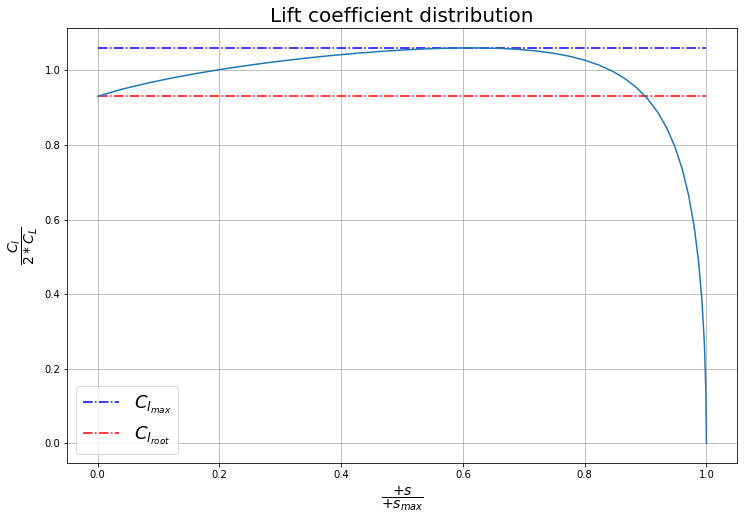

In [33]:
plt.figure(figsize=(12,8))

#plt.plot(z,C_L)
#plt.plot(z,C_L/CL_wing)
#plt.plot(z,C_L/(2*CL_wing))
#plt.plot(z,C_L/np.max(C_L))

#Normalized +s
#plt.plot(z/np.max(z),C_L)
#plt.plot(z/np.max(z),C_L/(CL_wing))
plt.plot(z/np.max(z),C_L/(2*CL_wing))
#plt.plot(z/np.max(z),C_L/np.max(C_L))


#plt.hlines(y=np.max(C_L), xmin=0.0, xmax=b/1, color='b', label="cl_max")
#plt.hlines(y=C_L[n-1], xmin=0.0, xmax=b/1, color='r', label="cl_root")

plt.hlines(y=np.max(C_L/(2*CL_wing)), xmin=0.0, xmax=z/np.max(z),linestyles='dashdot',color='b',label="$C_{l_{max}}$")
plt.hlines(y=C_L[n-1]/(2*CL_wing), xmin=0.0, xmax=z/np.max(z), linestyles='dashdot',color='r', label="$C_{l_{root}}$")


#plt.xlabel('+s (m)')
plt.xlabel('$\dfrac{+s}{+s_{max}}$',fontsize=14)
#plt.ylabel(r'$c_l$',fontsize=14)
plt.ylabel(r'$\dfrac{C_l}{2*C_L}$',fontsize=14)
plt.title('Lift coefficient distribution',fontsize=20)
plt.grid()

plt.plot(0,np.max(C_L), 1,0.4)

plt.legend(loc=0,fontsize=18)

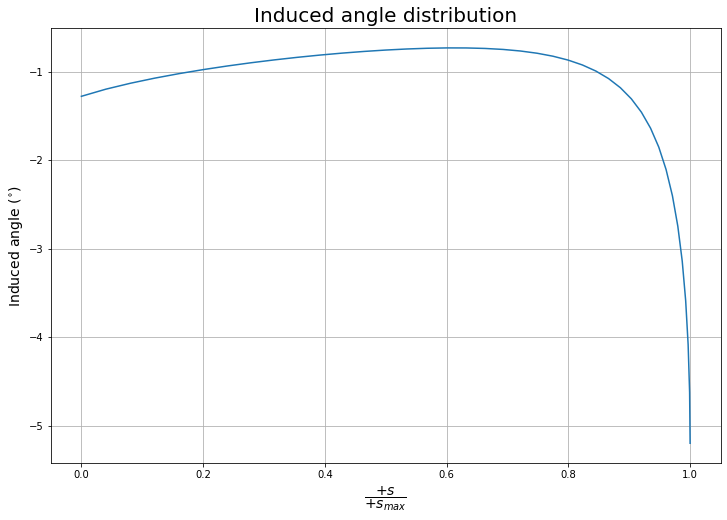

In [34]:
plt.figure(figsize=(12,8))

#plt.plot(z,ind_a*180/np.pi)
plt.plot(z/np.max(z),ind_a*180/np.pi)

#For downwash
#plt.plot(z,dw)

#plt.xlabel('+s (m)')
plt.xlabel('$\dfrac{+s}{+s_{max}}$',fontsize=14)
plt.ylabel('Induced angle $(^{\circ})$',fontsize=14)
plt.title('Induced angle distribution',fontsize=20)
plt.grid()

#plt.legend(loc=1)

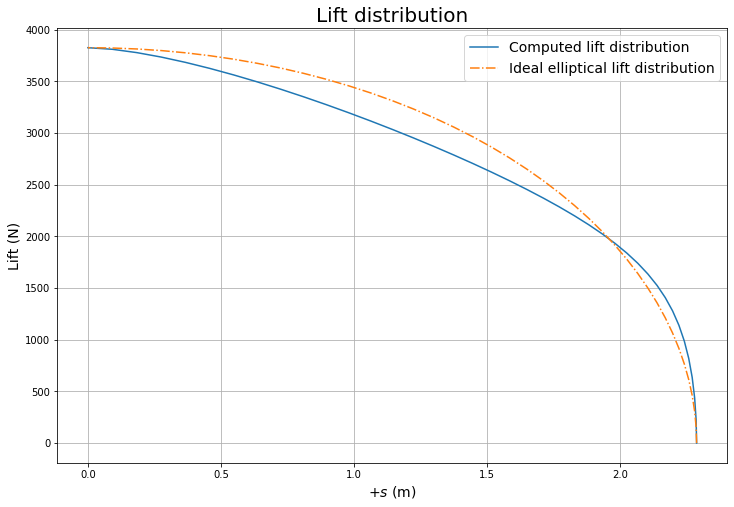

In [35]:
plt.figure(figsize=(12,8))

#plt.plot(z/np.max(z),Ls)
#plt.plot(z/np.max(z),Ls/np.max(Ls))
plt.plot(z,Ls,label="Computed lift distribution")
#plt.plot(z/np.max(z),Ls)

#elliptical lift distribution
el=np.sqrt( (1 - (z/(b/2))**2)*np.max(Ls)**2)
plt.plot(z,el,'-.',label="Ideal elliptical lift distribution")

plt.xlabel('$+s$ (m)',fontsize=14)
#plt.xlabel('$\dfrac{+s}{+s_{max}}$',fontsize=14)
plt.ylabel('Lift (N)',fontsize=14)
plt.title('Lift distribution',fontsize=20)
plt.grid()

plt.legend(loc=0,fontsize=14)